In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
import json
import numpy as np
import requests
#from config import g_key
eia="5f37c0ee03a8d0b528f90c73b145f8b4"
#testing conflicts

In [28]:
df=pd.DataFrame(pd.read_csv("cleaned_data.csv"))

In [29]:
states_df=pd.DataFrame(pd.read_csv("world_country_and_usa_states_latitude_and_longitude_values.csv"))
states_df.head()
states=states_df["usa_state"].tolist()
states_df

,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California
5,CO,39.550051,-105.782067,Colorado
6,CT,41.603221,-73.087749,Connecticut
7,DC,38.905985,-77.033418,District of Columbia
8,DE,38.910832,-75.527670,Delaware
9,FL,27.664827,-81.515754,Florida


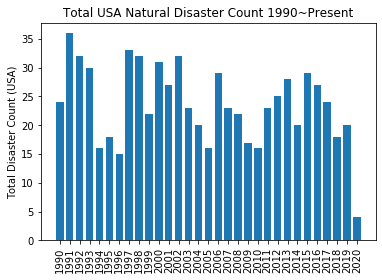

In [30]:
df.head()
by_year_df=df.groupby("Year")
by_year_df.head()
by_year_df.count()
year_counts=by_year_df.count()["Disaster Subgroup"].tolist()
years_list=df["Year"].unique().tolist()
plt.bar(range(len(year_counts)),year_counts,width=.75)
tick_locations = [value for value in range(len(year_counts))]
plt.xticks(tick_locations, years_list,rotation=90)
plt.ylabel("Total Disaster Count (USA)")
plt.tick_params(labelsize=10)
plt.title("Total USA Natural Disaster Count 1990~Present")
plt.savefig("Total USA Natural Disaster Count 1990~Present.png")

In [31]:
cs_states=df["Location"].tolist()
test=cs_states[5] #Texas
state_counts=[]
for st in states:
    count=0
    for string in cs_states:
        if str(string).count(st)>0:
            count=count+1
    state_counts.append(count)

In [32]:
states_df["State Counts"]=state_counts
fema_df=pd.DataFrame(pd.read_csv("DisasterDeclarationsSummaries.csv"))
group=fema_df.groupby(["state","Year"])
group.count().loc["CA"]
year_state_counts=[]
stcodes=states_df["usa_state_code"].tolist()
del stcodes[7]
del stcodes[39]
for code in stcodes:
    year_state_counts.append(group.count().loc[code]["disasterNumber"])

In [78]:
for num in range(len(year_state_counts)):
    for ID in year_state_counts[num].index:
        if (ID <1984) or (ID >2010):
            del year_state_counts[num][ID]
for num in range(len(year_state_counts)):
    for year in np.arange(1984,2011):
        try:
            print(year_state_counts[num][year])
        except:
            year_state_counts[num][year]=0

0
0
0
6
1
15
1
5
0
0
3
0
6
0
0
0
14
1
10
13
7
7
8
8
4
9
1
8
2
0
0
0
0
62
12
0
67
27
5
55
3
44
19
6
17
22
69
67
141
0
8
71
31
19
0
0
0
0
12
24
37
21
5
0
17
0
6
53
1
22
0
141
20
41
28
75
7
0
101
141
63
11
2
0
0
0
0
1
8
0
17
5
2
3
0
0
2
2
8
10
7
3
43
15
0
1
2
22
0
8
39
1
12
0
16
33
12
27
13
99
0
52
41
18
1
0
14
8
40
79
58
27
49
22
14
15
0
0
0
0
1
0
1
0
0
3
0
1
13
0
12
4
14
81
30
5
66
4
27
5
1
2
6
0
8
0
0
2
0
6
0
11
0
0
8
0
0
3
0
0
0
8
7
16
10
7
0
0
5
0
0
0
0
0
0
0
0
2
4
2
0
3
0
1
1
0
0
0
7
0
4
1
0
0
0
3
5
31
8
0
0
0
43
0
8
45
26
9
18
16
195
125
80
108
0
12
232
102
21
28
113
35
0
6
0
0
0
0
0
38
24
0
115
67
13
51
0
119
8
57
1
0
0
111
159
0
22
21
70
0
0
0
0
0
1
0
1
0
6
0
0
0
0
2
3
0
1
2
0
1
1
5
3
7
4
3
1
5
0
0
4
1
0
56
16
44
123
0
0
31
0
96
38
0
23
21
0
77
99
0
114
115
1
117
4
0
0
0
0
0
0
0
0
0
0
0
10
30
0
0
16
0
0
0
0
46
1
4
2
0
8
0
23
0
11
0
5
29
0
1
39
16
19
44
7
0
53
0
37
68
16
4
118
6
55
35
33
11
0
0
1
0
0
0
30
100
21
6
0
0
85
13
34
57
0
29
63
67
89
229
2
52
110
37
0
6
0
0
10
0
0
0
6
0


In [104]:
hehe=pd.DataFrame(data=year_state_counts,index=st_codes)
hehe=hehe.transpose()
hehe.to_csv("disaster_count_by_year&state.csv")

In [68]:
ysl=[]
for num in range(len(year_state_counts)):
    ysl.append(year_state_counts[num].tolist())


Year
1980      2
1981      2
1984      8
1985      2
1990     62
1991     12
1993     67
1994     27
1995      5
1996     55
1997      3
1998     44
1999     19
2000      6
2001     17
2002     22
2003     69
2004     67
2005    141
2007      8
2008     71
2009     31
2010     19
1983      0
Name: disasterNumber, dtype: int64

In [35]:
gmaps.configure(api_key=g_key)
locs=states_df[["usa_state_latitude", "usa_state_longitude"]]
myfig=gmaps.figure()
heatmap = gmaps.heatmap_layer(locs, weights=state_counts, 
                                 dissipating=False,max_intensity=states_df["State Counts"].max()-40,
                                 point_radius=1.5)
myfig.add_layer(heatmap)
myfig

NameError: name 'g_key' is not defined

In [36]:
info_box_template = """
<dl>
<dt>Disaster Count</dt><dd>{State Counts}</dd>
<dt>State</dt><dd>{usa_state}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
state_info = [info_box_template.format(**row) for index, row in states_df.iterrows()]

In [37]:
marker_layer = gmaps.marker_layer(locs, info_box_content=state_info)
myfig.add_layer(marker_layer)
myfig

NameError: name 'locs' is not defined

In [49]:
url="http://api.eia.gov/series/?api_key={0}&series_id=PET.EMA_EPM0_PTC_S{1}_DPG.A"
#test=requests.get(url.format(eia)).json()
gas_years=np.arange(1984,2020).tolist()
#test["series"][0]["data"][10][1]   example of grabing gas price
req_list=[]
for code in states_df["usa_state_code"]:
    req_list.append(requests.get(url.format(eia,code)).json())

In [50]:
del req_list[39]
del req_list[7]

In [52]:

mydict={
    "State":states_df["usa_state"],
    "Price":[],
    "Year":gas_years
}
#tester=pd.DataFrame(mydict)
for num in range(len(req_list)):
    for num1 in range(len(req_list[0]["series"][0]["data"])):
        if req_list[num]["series"][0]["data"][num1][1] is None:
            pass
        else:
            mydict["Price"].append(req_list[num]["series"][0]["data"][num1][1])
len(mydict["Price"])/27

50.0

In [58]:
counter=1
st_codes=states_df["usa_state_code"].tolist()
del st_codes[7]
del st_codes[39]

In [44]:
l=[1,2,3,4]

In [22]:
l.clear()
l

[]

In [59]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
test=list(chunks(mydict["Price"],27))
dates=np.arange(1984,2011).tolist()
tester_df=pd.DataFrame(test,index=st_codes,columns=dates)
tester_df=tester_df.transpose()
tester_df.to_csv("gas_price_state_year_inflated.csv")